타이타닉호의 pandas 그래프 그리기

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
titanic_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
df = pd.read_csv(titanic_url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df['Age'].fillna(df.Age.median(), inplace=True)

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

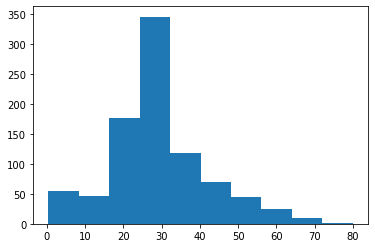

In [6]:
plt.hist(df['Age'])

78 787 26 891


<AxesSubplot:ylabel='Age'>

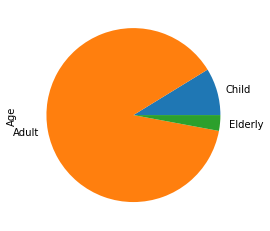

In [7]:
age1 = (df['Age'] < 15).sum()
age2 = ( (df['Age'] >= 15) & (df['Age'] < 60)).sum()
age3 = (df['Age'] >= 60).sum()
print(age1, age2, age3, (age1+age2+age3))

series = pd.Series([age1, age2, age3], index=['Child', 'Adult', 'Elderly'], name='Age')
series.plot.pie(figsize=(4,4))

In [8]:
cross_01 = df.pivot_table(index=['Survived'], columns=['Sex'], values=['PassengerId'], aggfunc='count', fill_value=0)
print(cross_01)

         PassengerId     
Sex           female male
Survived                 
0                 81  468
1                233  109


<AxesSubplot:xlabel='Survived'>

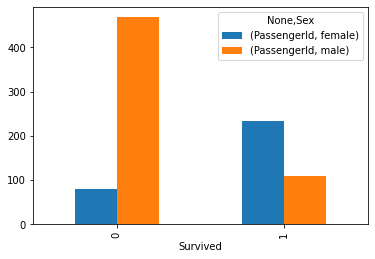

In [9]:
cross_01.plot(kind='bar')